### Score Prediction with Venue

In [11]:
## IMporting essential libraries
import pandas as pd
import pickle

# Loading the dataset
df = pd.read_csv('ipl.csv')
df.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [13]:
# df.isnull().sum()
df.columns

Index(['mid', 'date', 'venue', 'bat_team', 'bowl_team', 'batsman', 'bowler',
       'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'striker',
       'non-striker', 'total'],
      dtype='object')

In [14]:
# ----Data Cleaning ----
# Removing unwanted columns
columns_to_remove = ['mid','batsman', 'bowler','striker','non-striker']
df.drop(labels=columns_to_remove,axis=1,inplace=True)
df.head()

,date,venue,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222
2,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222
3,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,222
4,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,222


In [15]:
df['bat_team'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Deccan Chargers', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant'], dtype=object)

In [16]:
# Keeping only Consistent teams
consistent_teams = ['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Kings XI Punjab','Royal Challengers Bangalore', 'Delhi Daredevils',
       'Sunrisers Hyderabad']

In [17]:
df = df[(df['bat_team'].isin(consistent_teams)) & (df['bowl_team'].isin(consistent_teams))]

In [19]:
df.shape

(53811, 10)

In [20]:
df.columns

Index(['date', 'venue', 'bat_team', 'bowl_team', 'runs', 'wickets', 'overs',
       'runs_last_5', 'wickets_last_5', 'total'],
      dtype='object')

In [21]:
temp = df.groupby('venue')['total'].count()/len(df)
print(temp)

venue
Barabati Stadium                                        0.006913
Brabourne Stadium                                       0.023341
Buffalo Park                                            0.004757
De Beers Diamond Oval                                   0.002267
Dr DY Patil Sports Academy                              0.011187
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium     0.011466
Dubai International Cricket Stadium                     0.016131
Eden Gardens                                            0.112728
Feroz Shah Kotla                                        0.105889
Himachal Pradesh Cricket Association Stadium            0.016112
Holkar Cricket Stadium                                  0.004646
JSCA International Stadium Complex                      0.013306
Kingsmead                                               0.025144
M Chinnaswamy Stadium                                   0.110479
MA Chidambaram Stadium, Chepauk                         0.092583
Maharashtra Cricket

In [23]:
temp_df = temp[temp>0.01].index

In [25]:
len(temp_df)

23

In [26]:
len(temp)

31

In [28]:
df['venue'] = np.where(df['venue'].isin(temp_df),df['venue'],'New ground')

<IPython.core.display.Javascript object>

In [31]:
df.shape  ## just less then 1% stadium name is New Ground now...

(53811, 10)

In [32]:
df

,date,venue,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222
2,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222
3,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,222
4,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,222
5,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.5,2,0,222
6,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,3,0,0.6,3,0,222
7,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,3,0,1.1,3,0,222
8,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,7,0,1.2,7,0,222
9,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,11,0,1.3,11,0,222


In [33]:
label_ordered = df.groupby(['venue'])['total'].mean().sort_values().index
label_ordered

Index(['Shaheed Veer Narayan Singh International Stadium',
       'New Wanderers Stadium', 'JSCA International Stadium Complex',
       'Kingsmead', 'Dubai International Cricket Stadium',
       'Sheikh Zayed Stadium', 'SuperSport Park', 'New ground',
       'Sawai Mansingh Stadium', 'Eden Gardens',
       'Rajiv Gandhi International Stadium, Uppal',
       'Dr DY Patil Sports Academy', 'Sharjah Cricket Stadium',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'St George's Park', 'Feroz Shah Kotla',
       'Punjab Cricket Association IS Bindra Stadium, Mohali',
       'Sardar Patel Stadium, Motera',
       'Punjab Cricket Association Stadium, Mohali', 'M Chinnaswamy Stadium',
       'MA Chidambaram Stadium, Chepauk', 'Wankhede Stadium',
       'Himachal Pradesh Cricket Association Stadium', 'Brabourne Stadium'],
      dtype='object', name='venue')

In [35]:
label_ordered={k:i for i,k in enumerate(label_ordered,0)}
label_ordered

{'Shaheed Veer Narayan Singh International Stadium': 0,
 'New Wanderers Stadium': 1,
 'JSCA International Stadium Complex': 2,
 'Kingsmead': 3,
 'Dubai International Cricket Stadium': 4,
 'Sheikh Zayed Stadium': 5,
 'SuperSport Park': 6,
 'New ground': 7,
 'Sawai Mansingh Stadium': 8,
 'Eden Gardens': 9,
 'Rajiv Gandhi International Stadium, Uppal': 10,
 'Dr DY Patil Sports Academy': 11,
 'Sharjah Cricket Stadium': 12,
 'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium': 13,
 "St George's Park": 14,
 'Feroz Shah Kotla': 15,
 'Punjab Cricket Association IS Bindra Stadium, Mohali': 16,
 'Sardar Patel Stadium, Motera': 17,
 'Punjab Cricket Association Stadium, Mohali': 18,
 'M Chinnaswamy Stadium': 19,
 'MA Chidambaram Stadium, Chepauk': 20,
 'Wankhede Stadium': 21,
 'Himachal Pradesh Cricket Association Stadium': 22,
 'Brabourne Stadium': 23}

In [36]:
df['venue']=df['venue'].map(label_ordered)

In [37]:
df.head()

,date,venue,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,2008-04-18,19,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,2008-04-18,19,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222
2,2008-04-18,19,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222
3,2008-04-18,19,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,222
4,2008-04-18,19,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,222


In [38]:
# Removing the first 5 overs data in every match
df = df[df['overs']>=5.0]
df.head()

,date,venue,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
32,2008-04-18,19,Kolkata Knight Riders,Royal Challengers Bangalore,61,0,5.1,59,0,222
33,2008-04-18,19,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.2,59,1,222
34,2008-04-18,19,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.3,59,1,222
35,2008-04-18,19,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.4,59,1,222
36,2008-04-18,19,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.5,58,1,222


In [39]:
## check the team
print(df['bat_team'].unique())
print(df['bowl_team'].unique())

['Kolkata Knight Riders' 'Chennai Super Kings' 'Rajasthan Royals'
 'Mumbai Indians' 'Kings XI Punjab' 'Royal Challengers Bangalore'
 'Delhi Daredevils' 'Sunrisers Hyderabad']
['Royal Challengers Bangalore' 'Kings XI Punjab' 'Delhi Daredevils'
 'Rajasthan Royals' 'Mumbai Indians' 'Chennai Super Kings'
 'Kolkata Knight Riders' 'Sunrisers Hyderabad']


In [40]:
# Converting the column 'date' from string into datatime object
from datetime import datetime 
df['date'] = df['date'].apply(lambda x: datetime.strptime(x,'%Y-%m-%d'))

C:\Users\91911\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [41]:
# ---- Data Preprocessing ----
## converting categorical feature using OneHotEncoding method
encoded_df = pd.get_dummies(data=df,columns=['bat_team','bowl_team'])

In [42]:
encoded_df.head()

,date,venue,runs,wickets,overs,runs_last_5,wickets_last_5,total,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,...,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,bowl_team_Delhi Daredevils,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad
32,2008-04-18,19,61,0,5.1,59,0,222,0,0,...,0,0,0,0,0,0,0,0,1,0
33,2008-04-18,19,61,1,5.2,59,1,222,0,0,...,0,0,0,0,0,0,0,0,1,0
34,2008-04-18,19,61,1,5.3,59,1,222,0,0,...,0,0,0,0,0,0,0,0,1,0
35,2008-04-18,19,61,1,5.4,59,1,222,0,0,...,0,0,0,0,0,0,0,0,1,0
36,2008-04-18,19,61,1,5.5,58,1,222,0,0,...,0,0,0,0,0,0,0,0,1,0


In [43]:
encoded_df.columns

Index(['date', 'venue', 'runs', 'wickets', 'overs', 'runs_last_5',
       'wickets_last_5', 'total', 'bat_team_Chennai Super Kings',
       'bat_team_Delhi Daredevils', 'bat_team_Kings XI Punjab',
       'bat_team_Kolkata Knight Riders', 'bat_team_Mumbai Indians',
       'bat_team_Rajasthan Royals', 'bat_team_Royal Challengers Bangalore',
       'bat_team_Sunrisers Hyderabad', 'bowl_team_Chennai Super Kings',
       'bowl_team_Delhi Daredevils', 'bowl_team_Kings XI Punjab',
       'bowl_team_Kolkata Knight Riders', 'bowl_team_Mumbai Indians',
       'bowl_team_Rajasthan Royals', 'bowl_team_Royal Challengers Bangalore',
       'bowl_team_Sunrisers Hyderabad'],
      dtype='object')

In [44]:
## Rearranging the columns
encoded_df = encoded_df[['date','venue','bat_team_Chennai Super Kings', 'bat_team_Delhi Daredevils',
       'bat_team_Kings XI Punjab', 'bat_team_Kolkata Knight Riders',
       'bat_team_Mumbai Indians', 'bat_team_Rajasthan Royals',
       'bat_team_Royal Challengers Bangalore', 'bat_team_Sunrisers Hyderabad',
       'bowl_team_Chennai Super Kings', 'bowl_team_Delhi Daredevils',
       'bowl_team_Kings XI Punjab', 'bowl_team_Kolkata Knight Riders',
       'bowl_team_Mumbai Indians', 'bowl_team_Rajasthan Royals',
       'bowl_team_Royal Challengers Bangalore',
       'bowl_team_Sunrisers Hyderabad','overs','runs', 'wickets', 'runs_last_5', 'wickets_last_5',
       'total']]

In [45]:
## Splitting the data into train and test set
X_train = encoded_df.drop(labels='total',axis=1)[encoded_df['date'].dt.year <= 2016]
X_test = encoded_df.drop(labels='total',axis=1)[encoded_df['date'].dt.year >= 2017]

In [46]:
y_train = encoded_df[encoded_df['date'].dt.year <= 2016]['total'].values
y_test = encoded_df[encoded_df['date'].dt.year >= 2017]['total'].values

In [49]:
## Removing the 'data' column
X_train.drop(labels='date',axis=True,inplace=True)
X_test.drop(labels='date',axis=True,inplace=True)

In [50]:
### ---- Model Building ----
## Linear Regression Model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# ## Create a pickle file for the classifier
# filename = 'first-innings-score-lr-model.pkl
# pickle.dump(regressor,open(filename,'wb'))

In [51]:
y_pred = regressor.predict(X_test)
y_pred[:10]

array([170.55852066, 173.61808359, 173.03951725, 176.09908018,
       179.17769548, 179.49913527, 177.41104779, 176.81342906,
       177.23013074, 178.68336321])

In [55]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [58]:
print('MAE :',mean_absolute_error(y_test,y_pred))
print('MSE :',mean_squared_error(y_test,y_pred))
print('RMSE :',np.sqrt(mean_squared_error(y_test,y_pred)))

MAE : 12.302395227497593
MSE : 264.2785080267648


<IPython.core.display.Javascript object>

RMSE : 16.25664504215937


#### Extra Line add

### Ridge Regression 

In [59]:
## Ridge Regression 
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [60]:
ridge = Ridge()
parameters = {'alpha':[1e-15,1e-10,1e-8,1e-2,1,5,10,20,30,35,40]}
ridge_regressor = GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X_train,y_train)

C:\Users\91911\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.24937e-20): result may not be accurate.
  overwrite_a=True).T
C:\Users\91911\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=3.16211e-21): result may not be accurate.
  overwrite_a=True).T
C:\Users\91911\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.44787e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\91911\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.48382e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\91911\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.41562e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\91911\Anaconda3\lib\site-packages\sklearn\linear_mo

GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.01, 1, 5, 10, 20, 30,
                                   35, 40]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [61]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 40}
-323.1517347782272


In [62]:
prediction = ridge_regressor.predict(X_test)
prediction[:10]

array([170.52945356, 173.59016326, 173.01068001, 176.0713897 ,
       179.15054061, 179.47188499, 177.38309035, 176.7851659 ,
       177.1987163 , 178.65175505])

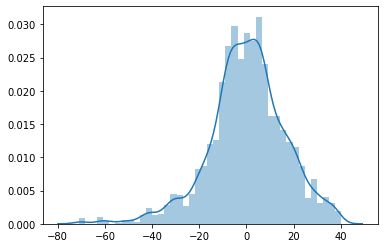

In [64]:
import seaborn as sns
sns.distplot(y_test-prediction)

In [65]:
from sklearn import metrics
import numpy as np
print('MAE :',metrics.mean_absolute_error(y_test,prediction))
print('MSE :',metrics.mean_squared_error(y_test,prediction))
print('RMSE :',np.sqrt(metrics.mean_squared_error(y_test,prediction)))

MAE : 12.302221606147816
MSE : 264.34544714218976
RMSE : 16.25870373499037


### Lasso Regression

In [67]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [68]:
lasso = Lasso()
parameters = {'alpha':[1e-15,1e-10,1e-8,1e-2,1,5,10,20,30,35,40]}
lasso_regressor = GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)
lasso_regressor.fit(X_train,y_train)

C:\Users\91911\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4463226.15592751, tolerance: 2529.9556965945626
  positive)
C:\Users\91911\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4332950.2561458545, tolerance: 2547.0380710286627
  positive)
C:\Users\91911\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4514222.076406572, tolerance: 2667.8126904366463
  positive)
C:\Users\91911\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Dualit

GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.01, 1, 5, 10, 20, 30,
                                   35, 40]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [69]:
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 1}
-312.24019651991046


In [70]:
prediction = lasso_regressor.predict(X_test)
prediction[:10]

array([168.53626586, 171.78954975, 171.05754573, 174.31082962,
       177.47393667, 177.78334305, 175.61561755, 174.97379037,
       174.83231258, 175.23189579])

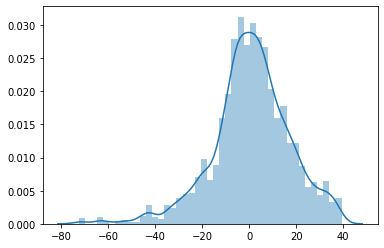

In [71]:
sns.distplot(y_test-prediction)

In [72]:
print('MAE :',metrics.mean_absolute_error(y_test,prediction))
print('MSE :',metrics.mean_squared_error(y_test,prediction))
print('RMSE :',np.sqrt(metrics.mean_squared_error(y_test,prediction)))

MAE : 12.466486159362134
MSE : 277.1581618256886
RMSE : 16.64806781058056


### Logistic regression

In [74]:
from sklearn.linear_model import LogisticRegression
log_regressor = LogisticRegression()
log_regressor.fit(X_train,y_train)
log_pred = log_regressor.predict(X_test)
log_pred[:10]

C:\Users\91911\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


array([165, 165, 165, 165, 194, 194, 194, 165, 194, 194], dtype=int64)

In [75]:
print('MAE :',metrics.mean_absolute_error(y_test,log_pred))
print('MSE :',metrics.mean_squared_error(y_test,log_pred))
print('RMSE :',np.sqrt(metrics.mean_squared_error(y_test,log_pred)))

MAE : 16.027717782577394
MSE : 438.0565154787617
RMSE : 20.92979969991977


### Support Vector Machines

In [76]:
from sklearn.svm import SVR
svm_model = SVR()
svm_model.fit(X_train,y_train)
svm_pred = svm_model.predict(X_test)
svm_pred[:10]

array([165.04670194, 170.58583096, 168.52572043, 174.04801633,
       178.59681883, 178.8709405 , 175.42735831, 174.26796524,
       170.08874368, 171.79047462])

In [77]:
print('MAE :',metrics.mean_absolute_error(y_test,svm_pred))
print('MSE :',metrics.mean_squared_error(y_test,svm_pred))
print('RMSE :',np.sqrt(metrics.mean_squared_error(y_test,svm_pred)))

MAE : 15.149915195222048
MSE : 390.8395825069434
RMSE : 19.769663186482045


### KNN algorithm

In [78]:
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor()
knn_model.fit(X_train,y_train)
knn_pred = knn_model.predict(X_test)
knn_pred[:10]

array([176.4, 154.2, 177.6, 192.4, 172.2, 172.6, 191.6, 175.6, 184.6,
       177.8])

In [79]:
print('MAE :',metrics.mean_absolute_error(y_test,knn_pred))
print('MSE :',metrics.mean_squared_error(y_test,knn_pred))
print('RMSE :',np.sqrt(metrics.mean_squared_error(y_test,knn_pred)))

MAE : 16.663786897048237
MSE : 486.5597408207343
RMSE : 22.05809921141743


**so the conclusion is this according to this the "linear regression" or "redge regresion" give the best accuracy.... 
and venue decrease our accuracy...**